# Parte I

In [1]:
#Importamos los códigos necesarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error



### Ejercicio 1

In [2]:
#Importamos la base de hogar y nos quedamos únicamente con las regiones de CABA y GBA
EPH_hogar = pd.read_excel('usu_hogar_T123.xlsx')
EPH_hogar = EPH_hogar.drop(EPH_hogar[(EPH_hogar["AGLOMERADO"] != 32) & (EPH_hogar["AGLOMERADO"] != 33)].index)
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
9,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,12.0,NaN,12,0,1,0,98,0,0,0
10,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,6.0,NaN,7,4733,1,0,2,0,0,0
11,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,33,2161,1,...,7.0,NaN,8,2672,1,0,98,0,0,0
35,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,33,3097,1,...,8.0,NaN,9,4844,1,0,98,0,0,0
98,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,33,2571,1,...,8.0,NaN,9,3482,1,0,97,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,TQRMNOQQTHLMNUCDEIJAH00780166,2023,1,1,1,1,S,33,808,1,...,4.0,NaN,4,864,1,0,98,0,0,0
16796,TQRMNOVWVHMMNQCDEIJAH00802643,2023,1,1,1,1,S,33,1686,1,...,7.0,NaN,8,3638,1,0,98,0,0,0
16797,TQRMNORRXHJOOMCDEIJAH00794543,2023,1,1,1,1,S,33,2461,1,...,12.0,NaN,12,0,2,0,1,3,45,0
16798,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,33,3381,1,...,1.0,NaN,1,4548,1,0,2,0,0,0


In [3]:
#Importamos la base de individuos y nos quedamos únicamente con las regiones de CABA y GBA
EPH_individual = pd.read_excel('usu_individual_T123.xlsx')
EPH_individual = EPH_individual.drop(EPH_individual[(EPH_individual["AGLOMERADO"] != 32) & (EPH_individual["AGLOMERADO"] != 33)].index)
EPH_individual

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
102,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
103,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
104,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
105,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
106,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,NaN,8,254000.00,10,NaN,10,10.0,NaN,10,1516
48598,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
48599,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
48600,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


### Ejercicio 2

In [4]:
#Unimos las bases
EPH = EPH_individual.merge(EPH_hogar, on = ["CODUSU", "NRO_HOGAR"], how='left')
EPH

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,COMPONENTE,H15,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,...,GDECCFR_y,PDECCFR_y,ADECCFR_y,PONDIH_y,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5.0,NaN,6,2540,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5.0,NaN,6,2540,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1.0,NaN,1,14082,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1.0,NaN,1,14082,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1.0,NaN,1,14082,2,1,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,10.0,NaN,10,1516,1,0,96,0,0,0
7615,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,12.0,NaN,12,0,1,2,3,0,0,0
7616,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,12.0,NaN,12,0,1,2,3,0,0,0
7617,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,12.0,NaN,12,0,1,2,3,0,0,0


### Ejercicio 3

In [5]:
#Eliminamos de la base las que termine en _y pues son las duplicadas
EPH = EPH.loc[:, ~EPH.columns.str.endswith('_y')]

#Eliminamos el _x de las variables
EPH = EPH.rename(columns={col: col.rstrip('_x') if col.endswith('_x') else col for col in EPH.columns})

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,2,1,0,1,1,0,96,0,0,0
7615,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0
7616,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0
7617,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0


In [6]:
#Definimos algunas funciones usadas en el TP anterior para limpiar la base

def drop_object_columns(df):
    '''
    Esta función elimina las columnas del dataframe cuyo tipo de datos son objetos para poder realizar estimaciones sobre valores numéricos
    Input:
            df: DataFrame
    Output:
            df: DataFrame sin columnas de tipo objeto
    '''
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    df = df.drop(columns=object_columns)
    
    return df

def drop_columns_with_nulls(df, threshold=0.7):
    '''
    Elimina las columnas del dataframe que tengan más missings que un umbral
    Input:
            df: DataFrame
            threshold: umbral mínimo de missings para eliminar la columna. Default: 0.7
    Output:
            df: DataFrame sin columnas con más missings que los señalados en el threshold
    '''

    null_threshold = len(df) * threshold

    high_null_columns = df.columns[df.isnull().sum() > null_threshold]

    df = df.drop(columns=high_null_columns)

    return df

def drop_rows_with_value(df, value_to_drop, lower_bound, upper_bound):
    '''
    Elimina valores numéricos específicos que, si no fuera por ellos, los mínimos y máximos de la columna serían inferiores a los especificados en el rango:
    Input:
            df: DataFrame
            value_to_drop: valor específico a eliminar
            lower_bound: límite inferior tolerado para las obseraciones
            upper_bound_ límite superior tolerado para las observacioens  
    Output:
            df: DataFrame con las filas eliminadas
    '''
    for column in df.columns:
        if df[column].dtype in [int, float]:
            column_values = []  # List to store non-matching values for this column
            for cell in df[column]:
                if cell != value_to_drop:
                    column_values.append(cell)
            mask = (min(column_values) >= lower_bound) & (max(column_values) <= upper_bound)
            df = df[~((df[column] == value_to_drop) & mask)]
    return df

In [7]:
#Eliminamos columnas con gran proporción de nulos
EPH = drop_columns_with_nulls(EPH, threshold=0.5)

#Elimnamos nulos señalados con otros valores como 9 o 99
EPH = drop_rows_with_value(EPH, 9, 0, 8)
EPH = drop_rows_with_value(EPH, 99, 0, 25)

#Eliminamos filas con valores sin sentido:

#Eliminamos valores de EDADES (CH06) menores que 0
EPH = EPH.drop(EPH[EPH["CH06"] < 0].index)

#Eliminamos valores de TIPO DE UNION (CH07) igual a 9 
EPH = EPH.drop(EPH[EPH["CH07"] == 9].index)

#Eliminamos valores de Cobertura Medica (CH08) igual a 9 que es no sabe no responde
EPH = EPH.drop(EPH[EPH["CH08"] == 9].index)

#Eliminamos valores de INGRESOS (P47T) menores que 0
EPH = EPH.drop(EPH[EPH["P47T"] < 0].index)

#Eliminamos valores de INGRESOS TOTALES FAMILIARES(ITF) menores que 0
EPH = EPH.drop(EPH[EPH["ITF"] < 0].index)

#Eliminamos 99 de la variable IV2 que indica cantidad de ambientes
EPH = EPH.drop(EPH[EPH["IV2"] == 99].index)

#Eliminamos 0 de la variable II2 que indica que la cantidad de ambientes donde duermen es 0
#Util para poder calcular hacinamiento luego
EPH = EPH.drop(EPH[EPH["II2"] == 0].index)

#Reemplazamos valores de MAS_500 por 0 y 1
EPH['MAS_500'] = EPH['MAS_500'].replace('N', 0)
EPH['MAS_500'] = EPH['MAS_500'].replace('S', 1)

#Aplicamos funcion drop object 

#REVISARRR NO APLICAMOS ESA

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,1,33,1545,...,2,2,0,2,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,1,33,1545,...,2,2,0,2,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,1,33,8423,...,2,3,1,2,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,1,33,8423,...,2,3,1,2,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,1,33,8423,...,2,3,1,2,2,1,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,1,33,1236,...,2,3,1,2,1,2,98,0,0,0
7613,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,1,33,1236,...,2,3,1,2,1,2,98,0,0,0
7614,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,1,33,1300,...,2,1,0,1,1,0,96,0,0,0
7615,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,1,33,1193,...,2,3,0,3,1,2,3,0,0,0


### Ejercicio 4

In [8]:
#Creamos variables útiles para predecir pobreza

#1: Hacinamiento
EPH["indice_hacinam"]=(EPH["IX_TOT"]/EPH["II2"])
EPH['hacinamiento'] = EPH['indice_hacinam'].apply(lambda x: 1 if x > 2.5 else 0)

#2: Jefatura_Mujer: 
#Variable que vale 1 si el hogar tiene como jefe una mujer
#Buscamos captar el fenomeno asociado a la "feminizacion de la pobreza"
jefamujer = ((EPH['CH03'] == 1) & (EPH['CH04'] == 2)).groupby(EPH['CODUSU']).transform('any')
EPH['jefa_mujer'] = jefamujer.astype(int)

#3: Proporción de niños
for codusu in EPH['CODUSU'].unique():
    personas_hogar = len(EPH[EPH['CODUSU'] == codusu])
    niños_hogar = len(EPH[(EPH['CODUSU'] == codusu) & (EPH['CH06'] < 12)])

    prop_niños = niños_hogar / personas_hogar
    EPH.loc[EPH['CODUSU'] == codusu, 'prop_niños'] = prop_niños

#4: Trabajo infantil y Adolescente
print(len(EPH[(EPH['CH06'] < 18) & (EPH['ESTADO'] == 1)]))
print(len(EPH[(EPH['CH06'] < 12) & (EPH['ESTADO'] == 1)]))
#No hay casos de trabajo infantil, pero si de trabajo adolescente

trabajoadol = ((EPH['ESTADO'] == 1) & (EPH['CH06'] <18)).groupby(EPH['CODUSU']).transform('any')
EPH['trabajo_adol'] = trabajoadol.astype(int)

EPH

11
0


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,indice_hacinam,hacinamiento,jefa_mujer,prop_niños,trabajo_adol
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,1,33,1545,...,0,2,0,0,0,2.0,0,1,0.000000,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,1,33,1545,...,0,2,0,0,0,2.0,0,1,0.000000,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,1,33,8423,...,1,98,0,0,0,1.5,0,0,0.333333,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,1,33,8423,...,1,98,0,0,0,1.5,0,0,0.333333,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,1,33,8423,...,1,98,0,0,0,1.5,0,0,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,1,33,1236,...,2,98,0,0,0,1.5,0,0,0.333333,0
7613,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,1,33,1236,...,2,98,0,0,0,1.5,0,0,0.333333,0
7614,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,1,33,1300,...,0,96,0,0,0,1.0,0,1,0.000000,0
7615,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,1,33,1193,...,2,3,0,0,0,1.0,0,1,0.000000,0


### Ejercicio 5

<Axes: >

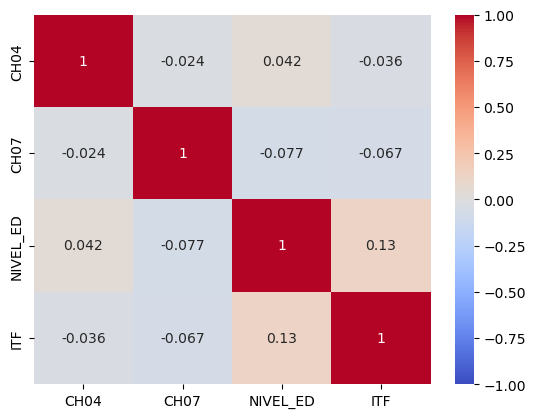

In [9]:
corr = EPH[["CH04", "CH07", "NIVEL_ED", "ITF"]].corr()
sns.heatmap(corr, vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

### Ejercicio 6

In [10]:
#Procedemos a crear las columnas adulto_equiv y la columna ad_equiv_hogar 

#Creamos una nueva columna donde agregamos un string de texto que contenga las comibinación de sexo y edad
EPH["sexo_edad"] = EPH["CH04"].astype(str) + "_" + EPH["CH06"].astype(str)

#Creamos las variables sexo y edad que pueden tomar cada uno de los valores posibles y 
#luego generamos todas las combinaciones posibles de sexo-edad
sexo = pd.Series([1, 2])
edad = pd.Series(range(104))
sexo_edad=[]
for i in sexo:
    for j in edad:
        sexo_edad.append(f"{i}_{j}")
sexo_edad

#Creamos un dataframe llamado Valores que tendrá las combinaciones posibles de sexo-edad
Valores=pd.DataFrame({'sexo_edad':sexo_edad})

#Creamos un vector con los valores de equivalencias respetando el orden del diccionario anterior
adulto_equiv= [0.35,	 0.37,	 0.46,	 0.51,	 0.55,	 0.6,	 0.64,	 0.66,	 0.68,	 
              0.69,	 0.79,	 0.82,	 0.85,	 0.9,	 0.96,	 1.0,	 1.03,	 1.04,	 
              1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 
              1.02,	 1.02,	 1.02,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.35,	 0.37,	 0.46,	 0.51,	 
              0.55,	 0.60,	 0.64,	 0.66,	 0.68,	 0.69,	 0.70,	 0.72,	 0.74,	 
              0.76,	 0.76,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63]

#Agregamos a nuestro dataframe dichas equivalencias
Valores["adulto_equiv"]=adulto_equiv

EPH = EPH.merge(Valores, how="left")

#A continuación sumamos el valor de equivalencia sexo-edad para cada uno de los hogares y lo almacenamos en una nueva variable que llamamos ad_equiv_hogar
ad_equiv_hogar = EPH.groupby(by="CODUSU").agg({"adulto_equiv":"sum"}).reset_index()
ad_equiv_hogar = ad_equiv_hogar.rename(columns={"adulto_equiv": "ad_equiv_hogar"})


#Nuevamente, agregamos esta nueva variable al dataframe anterior combinando por numero de hogar
EPH = EPH.merge(ad_equiv_hogar, how="left")

In [11]:
#Distinguimos entre quienes respondieron y quienes no respondieron su nivel de ingresos

respondieron= EPH[EPH["ITF"]!=0]
norespondieron= EPH[EPH["ITF"]==0]

In [12]:
#Agregamos la columna ingreso_necesario y la columna pobre, 
#para determinar quién es pobre, usamos una función creada en el anterior TP

respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]

def clasificar_pobreza(df):
    if df["ITF"] < df["ingreso_necesario"]:
        pobre = 1
    else:
        pobre = 0
    return pobre

respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)

C:\Users\manue\AppData\Local\Temp\ipykernel_16728\2260465514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]
C:\Users\manue\AppData\Local\Temp\ipykernel_16728\2260465514.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)


### Ejercicio 7

In [13]:
#Calculamos la proporción de individuos por debajo de la linea de pobreza dada el nivel de PONDIH

ITF_hogar = respondieron.groupby(by=['CODUSU', 'NRO_HOGAR', 'AGLOMERADO' ]).agg({'ITF': 'mean', 'ingreso_necesario': 'mean' ,'PONDIH': 'mean'}).reset_index()
ITF_hogar['pobre'] = ITF_hogar.apply(clasificar_pobreza, axis=1)
ITF_hogar

,CODUSU,NRO_HOGAR,AGLOMERADO,ITF,ingreso_necesario,PONDIH,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,1,33,240000.0,208830.6220,4580.0,0
1,TQRMNOPPQHKMQRCDEIJAH00780809,1,33,194600.0,262759.4090,5915.0,1
2,TQRMNOPPQHLNKTCDEIIAD00780107,1,32,410000.0,128511.1520,5949.0,0
3,TQRMNOPPQHLOKTCDEIJAH00719666,1,33,120000.0,63108.1550,228.0,0
4,TQRMNOPPQHMKLSCDEIIAD00801791,1,32,200000.0,80893.1805,114.0,0
...,...,...,...,...,...,...,...
1604,TQTMNOQWYHKNQLCDEIJAH00785853,1,33,260000.0,154328.1245,4063.0,0
1605,TQTMNORQXHMOSQCDEIJAH00802270,1,33,147000.0,185308.4915,5163.0,1
1606,TQTMNORTQHLMNUCDEIJAH00793701,1,33,320000.0,211125.4640,2754.0,0
1607,TQUMNOQTRHKMPSCDEIJAH00801913,1,33,27600.0,124495.1785,2397.0,1


In [14]:
#Funcion definida en el TP anterior

def tasa_pobreza_hogar(pobre, ponderacion):
    '''
    Recibe los valores de pobreza y su ponderación para calcular la tasa de pobreza:
    Input:
            pobre: Columna con la dummy que señale 1 si es pobre o 0 si no
            ponderación: Columna con ponderacción de cada valor de pobreza
    Output:
            tasa_pobreza: Tasa de pobreza
    '''
    tasa_pobreza = sum(pobre * ponderacion)/sum(ponderacion)
    return(tasa_pobreza)


In [15]:
#Calculamos la tasa de pobreza de Gran Buenos Aires
if (ITF_hogar['AGLOMERADO'].all() == 33):
    pobreza_GBA = tasa_pobreza_hogar(ITF_hogar['pobre'], ITF_hogar['PONDIH'])
print("Tasa de pobreza para GBA:", pobreza_GBA)

NameError: name 'pobreza_GBA' is not defined

In [16]:
aglomerados = [32, 33]

for aglomerado in aglomerados:
    opc = ITF_hogar['AGLOMERADO'] == aglomerado
    
    if opc.any():
        filtered_data = ITF_hogar[opc]
        tasa_pobreza = tasa_pobreza_hogar(filtered_data['pobre'], filtered_data['PONDIH'])
        if aglomerado==32:
            print(f"Tasa de pobreza para CABA: {tasa_pobreza}")
        else:
            print(f"Tasa de pobreza para partidos del GBA: {tasa_pobreza}")
    else:
        print(f"No hay datos para el AGLOMERADO {aglomerado}")

Tasa de pobreza para CABA: 0.11174183307806031
Tasa de pobreza para partidos del GBA: 0.35746067771171164


##completar: en el Indec las cifras son

todo GBA: 30,3
caba: 11,7
partidos gba 36,1

# Parte II

### Ejercicio 1

In [17]:
#Definimos evalua metodo
def evalua_metodo(model, X_train, X_test, y_train, y_test, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga', 'random_state': None, 'n_estimators': None, 'max_samples': None, 'max_features': None, 'max_depth': None, 'components': None, 'neighbours': None, "tree_splits": None}):
    '''
    Esta función evalua un modelo de estimación y devuelve diferentes métricas. 
    Input:
            model: es el nombre del modelo a implementar. Puede tomar los siguientes valores
                'log': modelo logístico
                'lda': modelo de análisis discriminante lineal
                'knn': modelo de vecinos cercanos
                'tre': modelo de arboles de clasificación eligiendo el nivel de profundidad que maximiza la accuracy promedio por cv
                'bag': modelo bagging de clasificación
                'rft': modelo random forest de clasificación
                'ada': modelo AdaBoost de clasificación
                'gbr': modelo Gradient Boosting de clasificación
            X_train: particion de la muestra de entrenamiento para predictores 
            y_train: particion de la muestra de entrenamiento para valores a predecir
            X_test: particion de la muestra de testeo para predictores
            y_test: particion de la muestra de testeo para valores a predecir
            hyperparameters: diccionario conteniendo las claves de hiperparámetros de regresión logística:
                'max_iter': cantidad de iteraciones máximas al estimar el modelo. Default: 10000
                'penalty': tipo de penalidad impuesta al modelo logístico. Default: None
                'C': magnitud de la penalidad impuesta expresada como la inversa del parámetro lamda. Mientras mayor C menor peso de la penalidad. Default: 1
                'solver': es el metodo empleado para la resolución de la regresión. Default: 'saga'
                'random_state': semilla para repetición de resultados. Default: None
                'n_estimators': cantidad de veces que se repite el modelo en los métodos de combinación de arboles (bag, rft, ada, gbr)
                'max_samples': cantidad máxima de observaciones por muestra para modetos bag y rft. Default: None 
                'max_features': cantidad máxima de variables para rft. Default: None 
                'max_depth': profundidad máxima para modelo gbr. Default: None
                'components': cantidad de componentes para lda. Default: None
                'neighbours': cantidad de vecinos para modelo de vecinos cercanos. Default: None
                'tree_splits': cantidad de particiones para cv en modelo tre. Default: None
                
    Output:
            Verdadero 0: cantidad de verdaderos negativos
            Falso 1: cantidad de falsos positivos
            Falso 0: cantidad de falsos negativos
            Verdadero 1: cantidad de verdaderos positivos
            ROC_Plot: Gráfico de la curva ROC
            AUC: Área debajo de la curva ROC
            Accuracy: nivel de accuracy
            ECM: Error Cuadrático Medio
            Precision: Precisión
            Coefficients: coeficientes de la regresión estimada
    '''
    model1 = model[:3]
    if model1 == 'log':
        m = LogisticRegression(max_iter = hyperparameters['max_iter'], penalty=hyperparameters['penalty'], C=hyperparameters['C'], solver = hyperparameters['solver']).fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'lda':
        components = int(''.join([char for char in model if char.isnumeric()]))
        m = LinearDiscriminantAnalysis(n_components=components)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'knn':
        neighbors = int(''.join([char for char in model if char.isnumeric()]))
        m = KNeighborsClassifier(n_neighbors=neighbors)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == "tre":
        n_splits = int(''.join([char for char in model if char.isnumeric()]))
        cv = KFold(n_splits=n_splits, random_state= hyperparameters['random_state'])            
        accuracies = list()
        max_attributes = len(list(test))
        depth_range = range(1, max_attributes + 1)

        for depth in depth_range:
            fold_accuracy = []
            tree_model = DecisionTreeClassifier(max_depth = depth)
    
            for i, (train_index, valid_index) in enumerate(cv.split(X_train)):   
                x_t, x_v = X_train.loc[train_index], X_train.loc[valid_index] 
                y_t, y_v = y_train.loc[train_index], y_train.loc[valid_index] 
                model = tree_model.fit(x_t, y_t) 
                valid_acc = model.score(x_v, y_v)
                fold_accuracy.append(valid_acc)
            avg = sum(fold_accuracy)/len(fold_accuracy)
            accuracies.append(avg)
        
        df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
        df = df[["Max Depth", "Average Accuracy"]]
            
        #Esto es para que el programa elija solo el valir con el mayor nivel de accuracy
        max_value_row = df[df["Average Accuracy"] == df["Average Accuracy"].max()]
        max_depth_value = max_value_row["Max Depth"].values[0]
        
        m = DecisionTreeClassifier(max_depth = max_depth_value).fit(X, y)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == "bag":
        m = BaggingClassifier(n_estimators= hyperparameters['n_estimators'], max_samples= hyperparameters['max_samples'], random_state = hyperparameters['random_state']) 
        m = m.fit(X_train, Y_train) 
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == "rft":
        m = RandomForestClassifier(n_estimators= hyperparameters['n_estimators'], max_samples= hyperparameters['max_samples'], max_features= hyperparameters['max_features'], random_state = hyperparameters['random_state']) 
        m = m.fit(X_train, Y_train) 
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    #aplicamos los dos modelos de Boosting vistos
    elif model1 == "ada":
        m = AdaBoostClassifier(n_estimators= hyperparameters['n_estimators'], random_state = hyperparameters['random_state'])
        m = m.fit(X_train, y_train) 
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == "gbr":
        m = GradientBoostingClassifier(n_estimators= hyperparameters['n_estimators'], max_depth= hyperperparameters['max_depth'], random_state = hyperparameters['random_state']) 
        m = m.fit(X_train, Y_train) 
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    else:
        print('Modelo no especificado correctamente')
    
    results = {}
    
    #Matriz de confusion
    matriz_confusion = confusion_matrix(y_test, y_test_pred)
    tn, fp , fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    results["Verdadero 0"] = tn
    results["Falso 1"] = fp
    results["Falso 0"] = fn
    results["Verdadero 1"] = tp
    
    #Curva ROC
    auc = roc_auc_score(y_test, y_test_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=model)
    display.plot()  
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plot_filename = "roc_curve.png"
    results['ROC_Plot'] = plot_filename
    plt.close()
    
    #AUC
    results['AUC'] = auc
    
    #Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    results['Accuracy'] = accuracy
    
    #ECM
    ecm = mean_squared_error(y_test, y_test_pred)
    results['ECM'] = ecm
    
    #ECM
    precision = results["Verdadero 1"]/(results["Verdadero 1"] + results["Falso 1"])
    results['Precision'] = precision
    
    #Coefficients
    if model1 != 'knn':
        coef = m.coef_
    else:
        coef = []
    results['Coefficients'] = coef
    return(results, m)

### Ejercicio 2

In [18]:
#Definimos cross_validation

def cross_validation(model, K, X, y, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga', 'random_state': None, 'n_estimators': None, 'max_samples': None, 'max_features': None, 'max_depth': None, 'components': None, 'neighbours': None, "tree_splits": None}):
    '''
    Esta función busca realizar validación cruzada a través del método KFold para diferentes configuraciones de modelos y parámetros. 
    Se separa la muestra en diferentes particiones de entrenamiento y testeo y se almacenan los resultados obtenidos en cada partición para cada modelo.
    Input:
            model: es el nombre del modelo a implementar. Puede tomar los siguientes valores
                'log': modelo logístico
                'lda#': modelo de análisis discriminante lineal con # componentes
                'knn#': modelo de vecinos cercanos con # vecinos
            K: cantidad de veces que se particiona la muestra
            X: predictores
            Y: output
            hyperparameters: diccionario conteniendo las claves de hiperparámetros de regresión logística:
                'max_iter': cantidad de iteraciones máximas al estimar el modelo. Default: 10000
                'penalty': tipo de penalidad impuesta al modelo logístico. Default: None
                'C': magnitud de la penalidad impuesta expresada como la inversa del parámetro lamda. Mientras mayor C menor peso de la penalidad. Default: 1
                'solver': es el metodo empleado para la resolución de la regresión. Default: 'saga'
                'random_state': semilla para repetición de resultados. Default: None
                'n_estimators': cantidad de veces que se repite el modelo en los métodos de combinación de arboles (bag, rft, ada, gbr)
                'max_samples': cantidad máxima de observaciones por muestra para modetos bag y rft. Default: None 
                'max_features': cantidad máxima de variables para rft. Default: None 
                'max_depth': profundidad máxima para modelo gbr. Default: None
                'components': cantidad de componentes para lda. Default: None
                'neighbours': cantidad de vecinos para modelo de vecinos cercanos. Default: None
                'tree_splits': cantidad de particiones para cv en modelo tre. Default: None

    Output:
        DataFrame with the following columns:
            "modelo": Indica el nombre del modelo empleado
            "hyperparameters": Indica la combinación de hiperparámetros empleada
            "particion": Muestra a la partición para la cuál se está haciendo referencia
            "ecm": Error Cuadrático Medio
            'Coefficients': Coeficientes Estimados
            
    '''
    ecms = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
    kf = KFold(n_splits=K, shuffle=True, random_state=hyperparameters['random_state'])
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sc = StandardScaler()
        X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
        X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
        a = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
        results = a[0]
        m = a[1]
        ecm = results['ECM']
        ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
    ecms = ecms.astype({"particion":int})
    return(ecms, m)

### Ejercicio 3

In [19]:
def evalua_config(model, K, X, y, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga', 'random_state': None, 'n_estimators': None, 'max_samples': None, 'max_features': None, 'max_depth': None, 'components': None, 'neighbours': None, "tree_splits": None}]):
    '''
    Esta función permite evaluar una lista de hiperparámetros con CV, compararlos y devolver la mejor configuración posible entendida como aquella que minimiza el ECM
    Input: 
            model:especifica el modelo utilizado
            K: muestra la cantidad de particiones que se harán para la muestra
            X: predictores
            y: output
            hyperparam: lista de diccionarios conteniendo los hiperparámetros con las siguientes claves:
                'max_iter': cantidad de iteraciones máximas al estimar el modelo. Default: 10000
                'penalty': tipo de penalidad impuesta al modelo logístico. Default: None
                'C': magnitud de la penalidad impuesta expresada como la inversa del parámetro lamda. Mientras mayor C menor peso de la penalidad. Default: 1
                'solver': es el metodo empleado para la resolución de la regresión. Default: 'saga'
                'random_state': semilla para repetición de resultados. Default: None
                'n_estimators': cantidad de veces que se repite el modelo en los métodos de combinación de arboles (bag, rft, ada, gbr)
                'max_samples': cantidad máxima de observaciones por muestra para modetos bag y rft. Default: None 
                'max_features': cantidad máxima de variables para rft. Default: None 
                'max_depth': profundidad máxima para modelo gbr. Default: None
                'components': cantidad de componentes para lda. Default: None
                'neighbours': cantidad de vecinos para modelo de vecinos cercanos. Default: None
                'tree_splits': cantidad de particiones para cv en modelo tre. Default: None
    Output:
            hyper: configuración óptima de hiperparámetros
            min_ecm: ECM mínimo correspondiente a dicha configuración
    '''
    min_ecm = np.Inf
    for i in hyperparam:
        hyperparameters = i
        a = cross_validation(model, K, X, y, hyperparameters)
        ecms = a[0]
        prom = ecms['ecm'].mean()
        if prom < min_ecm:
            min_ecms = prom
            hyper = hyperparameters
            modelo = a[1]
        else:
            min_ecms = min_ecms
            hyper = hyper
    return(hyper, min_ecms, modelo)

### Ejercicio 4

In [20]:
def evalua_metodos_multiples(models, X, y, K, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga', 'random_state': None, 'n_estimators': None, 'max_samples': None, 'max_features': None, 'max_depth': None, 'components': None, 'neighbours': None, "tree_splits": None}]):
    '''
    Esta función permite evaluar diferentes modelos con diferentes configuraciones de hiperparámetros.
    De la lista de configuraciones de hiperparámetros elige la mejor usando la función evalua_config
    Devuelve como resultado un DataFrame diferentes métricas para cada modelo con la mejor configuración de hiperparámetros
    Input:
            models:especifica una lista de modelos a utilizar modelo
            K: muestra la cantidad de particiones que se harán para la muestra
            X: predictores
            y: output
            hyperparam: lista de diccioanrios conteniendo hiperparámetros. Las claves de cada diccionario son:
                'max_iter': cantidad de iteraciones máximas al estimar el modelo. Default: 10000
                'penalty': tipo de penalidad impuesta al modelo logístico. Default: None
                'C': magnitud de la penalidad impuesta expresada como la inversa del parámetro lamda. Mientras mayor C menor peso de la penalidad. Default: 1
                'solver': es el metodo empleado para la resolución de la regresión. Default: 'saga'
                'random_state': semilla para repetición de resultados. Default: None
                'n_estimators': cantidad de veces que se repite el modelo en los métodos de combinación de arboles (bag, rft, ada, gbr)
                'max_samples': cantidad máxima de observaciones por muestra para modetos bag y rft. Default: None 
                'max_features': cantidad máxima de variables para rft. Default: None 
                'max_depth': profundidad máxima para modelo gbr. Default: None
                'components': cantidad de componentes para lda. Default: None
                'neighbours': cantidad de vecinos para modelo de vecinos cercanos. Default: None
                'tree_splits': cantidad de particiones para cv en modelo tre. Default: None
    Output:
            Verdadero 0: cantidad de verdaderos negativos
            Falso 1: cantidad de falsos positivos
            Falso 0: cantidad de falsos negativos
            Verdadero 1: cantidad de verdaderos positivos
            ROC_Plot: Gráfico de la curva ROC
            AUC: Área debajo de la curva ROC
            Accuracy: nivel de accuracy
            ECM: Error Cuadrático Medio
            Coefficients: coeficientes de la regresión estimada
    '''
    resultados = pd.DataFrame(columns=["modelo", "hiperparámetros", "Verdadero 0", "Falso 1", "Falso 0", "Verdadero 1", "ROC_Plot", "AUC", "Accuracy", "ECM", "Coefficients"])
    m = []
    for model in models:
        h = evalua_config(model, K, X, y, hyperparam)
        hyperparameters = h[0]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= hyperparameters['random_state'])
        sc = StandardScaler()
        X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
        X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
        a = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
        results = a[0]
        resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"], "Precision": results['Precision'], "Coefficients":results['Coefficients']}, ignore_index=True)
        m.append(a[1])
    return(resultados, m)

# Parte III

### Ejercicio 1

In [21]:
#Eliminamos de las bases las variables asociadas a ingresos, adulto_equiv, ad_equiv_hogar e ingreso_necesario

#Eliminamos variables de "Ingresos de la ocupacion principal de los asalariados"
respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de la ocupacion principal"
respondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de otras ocupaciones"
respondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total individual"
respondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos no laborales"
respondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total familiar"
respondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso per cápita familiar"
respondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')

#Eliminamos las columnas: adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron.drop(["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["adulto_equiv", "ad_equiv_hogar"], axis=1, inplace = True, errors='ignore')

C:\Users\manue\AppData\Local\Temp\ipykernel_16728\2528790227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
C:\Users\manue\AppData\Local\Temp\ipykernel_16728\2528790227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
C:\Users\manue\AppData\Local\Temp\ipykernel_16728\2528790227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [22]:
#QUE HACEMOS ACA?!
respondieron = respondieron.reset_index(drop = True)
norespondieron = norespondieron.reset_index(drop = True)
respondieron1 = respondieron.dropna()
respondieron1 = drop_object_columns(respondieron1)

#Determinamos que la variable pobre sea la dependiente y todas las demás las variables independientes
y = respondieron1['pobre']
X = respondieron1.drop(columns = ['pobre'])
X = sm.add_constant(X)

### Ejercicio 2

In [ ]:
models = ['log', 'lda', 'knn', 'tree', 'bagging', 'randomforest', 'adaBoost', 'GBR' ]
hyperparam = [{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga', 'random_state': None, 'n_estimators': None, 'max_samples': None, 'max_features': None, 'max_depth': None, 'components': None, 'neighbours': None, "tree_splits": None},
             {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga', 'random_state': None, 'n_estimators': None, 'max_samples': None, 'max_features': None, 'max_depth': None, 'components': None, 'neighbours': None, "tree_splits": None},]
K = 5
modelos_2 = evalua_metodos_multiples(models, X, y, K, hyperparam)
modelos_2[0]